[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/khetansarvesh/CV/blob/main/GANs-CNN.ipynb)


In [ ]:
import torch
import torch.nn as nn
import numpy as np
from tqdm import tqdm
import torchvision
from torchvision.utils import make_grid

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
LATENT_DIM = 64 # noisy input dimentions
IM_CHANNELS = 1 # no of channels in image = 1 cause black and white
IM_SIZE = (28, 28)

cuda


## Dataset

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]) # Define the transformation to normalize the data between 1 and -1 (mean = 0.5 and variance = 0.5 will transform to values between 1 and -1)
mnist = datasets.MNIST(root='./data', train=True, transform=transform, download=True) # downloading the MNIST train dataset and then applying some transformations
mnist_loader = DataLoader(dataset=mnist, batch_size=64, shuffle=True) # loading the downloaded dataset

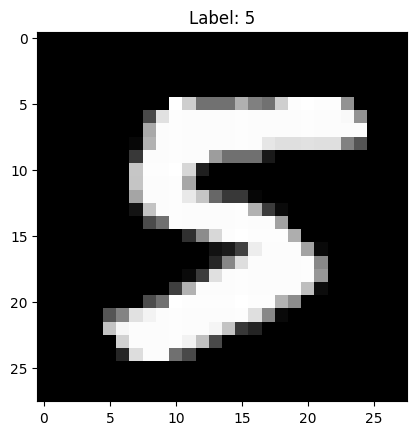

In [ ]:
# Display one image from one of the batches
images, labels = next(iter(mnist_loader)) # Extract one batch of images and labels
image = images[0].numpy().squeeze() # loading the one image from that batch
label = labels[0].item() # loading the actual label of the above image

import matplotlib.pyplot as plt
plt.imshow(image, cmap='gray')
plt.title(f"Label: {label}")
plt.show()

## Modelling

In [ ]:
class Generator(nn.Module):

    def __init__(self, latent_dim, im_size, im_channels):
        super().__init__()
        self.latent_dim = latent_dim
        self.im_size = im_size
        self.im_channels = im_channels

        layer_1 = nn.Sequential(nn.ConvTranspose2d(100, 512, kernel_size=4, stride=2, padding=1, output_padding=1, bias=False), nn.BatchNorm2d(512),nn.ReLU())
        layer_2 = nn.Sequential(nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, output_padding=1, bias=False), nn.BatchNorm2d(256),nn.ReLU())
        layer_3 = nn.Sequential(nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, output_padding=0, bias=False), nn.BatchNorm2d(128),nn.ReLU())
        layer_4 = nn.Sequential(nn.ConvTranspose2d(128, 1, kernel_size=4, stride=2, padding=1, output_padding=0, bias=False), nn.Identity(),nn.Tanh())
        self.layers = nn.ModuleList([layer_1, layer_2, layer_3, layer_4])

    def forward(self, z):
        batch_size = z.shape[0]
        out = z.reshape(-1, self.latent_dim, 1, 1)
        for layer in self.layers:
            out = layer(out)
        out = out.reshape(batch_size, self.im_channels, self.im_size, self.im_size)
        return out

In [ ]:
class Discriminator(nn.Module):

    def __init__(self):
        super().__init__()
        layer_1 = nn.Sequential(nn.Conv2d(1, 128, kernel_size=4, stride=2, padding=1, bias=True), nn.Identity(),nn.LeakyReLU())
        layer_2 = nn.Sequential(nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1, bias=False), nn.BatchNorm2d(256),nn.LeakyReLU())
        layer_3 = nn.Sequential(nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1, bias=False), nn.BatchNorm2d(512),nn.LeakyReLU())
        layer_4 = nn.Sequential(nn.Conv2d(512, 1, kernel_size=4, stride=2, padding=1, bias=False), nn.Identity(),nn.Identity())
        self.layers = nn.ModuleList([layer_1, layer_2, layer_3, layer_4])

    def forward(self, x):
        out = x
        for layer in self.layers:
            out = layer(out)
        return out.reshape(x.size(0))

## Training

In [ ]:
from torch.optim import Adam

# Instantiate generator model
im_channels = 1
im_size = 28
latent_dim = 100
generator = Generator(latent_dim, im_size, im_channels).to(device)
generator.train()
optimizer_generator = Adam(generator.parameters(), lr=0.0005, betas=(0.5, 0.999)) #0.5 is momentum

# Instantiate discriminator model
discriminator = Discriminator().to(device)
discriminator.train()
optimizer_discriminator = Adam(discriminator.parameters(), lr=0.0005, betas=(0.5, 0.999)) #0.5 is momentum

100%|██████████| 938/938 [00:59<00:00, 15.77it/s]


Finished epoch:1 | Generator Loss : nan | Discriminator Loss : nan | Discriminator real pred : 0.997978283239326 | Discriminator fake pred : 0.0006807594326577089


100%|██████████| 938/938 [00:58<00:00, 16.01it/s]


Finished epoch:2 | Generator Loss : nan | Discriminator Loss : -12.636838716738769 | Discriminator real pred : 1.0 | Discriminator fake pred : 0.0


100%|██████████| 938/938 [00:59<00:00, 15.75it/s]


Finished epoch:3 | Generator Loss : nan | Discriminator Loss : -14.083155557799186 | Discriminator real pred : 1.0 | Discriminator fake pred : 0.0


100%|██████████| 938/938 [00:59<00:00, 15.64it/s]


Finished epoch:4 | Generator Loss : nan | Discriminator Loss : -15.190480413213214 | Discriminator real pred : 1.0 | Discriminator fake pred : 0.0


100%|██████████| 938/938 [01:00<00:00, 15.47it/s]


Finished epoch:5 | Generator Loss : nan | Discriminator Loss : -16.123556919951938 | Discriminator real pred : 1.0 | Discriminator fake pred : 0.0


100%|██████████| 938/938 [01:00<00:00, 15.39it/s]


Finished epoch:6 | Generator Loss : nan | Discriminator Loss : -16.949072061062875 | Discriminator real pred : 1.0 | Discriminator fake pred : 0.0


100%|██████████| 938/938 [01:01<00:00, 15.30it/s]


Finished epoch:7 | Generator Loss : nan | Discriminator Loss : -17.69630729211673 | Discriminator real pred : 1.0 | Discriminator fake pred : 0.0


100%|██████████| 938/938 [01:01<00:00, 15.34it/s]


Finished epoch:8 | Generator Loss : nan | Discriminator Loss : -18.38107601157638 | Discriminator real pred : 1.0 | Discriminator fake pred : 0.0


100%|██████████| 938/938 [01:01<00:00, 15.28it/s]


Finished epoch:9 | Generator Loss : nan | Discriminator Loss : -19.013039586894802 | Discriminator real pred : 1.0 | Discriminator fake pred : 0.0


100%|██████████| 938/938 [01:00<00:00, 15.38it/s]


Finished epoch:10 | Generator Loss : nan | Discriminator Loss : -19.59895383269548 | Discriminator real pred : 1.0 | Discriminator fake pred : 0.0


100%|██████████| 938/938 [01:01<00:00, 15.35it/s]


Finished epoch:11 | Generator Loss : nan | Discriminator Loss : -20.144577365948447 | Discriminator real pred : 1.0 | Discriminator fake pred : 0.0


100%|██████████| 938/938 [01:01<00:00, 15.32it/s]


Finished epoch:12 | Generator Loss : nan | Discriminator Loss : -20.654100115111135 | Discriminator real pred : 1.0 | Discriminator fake pred : 0.0


100%|██████████| 938/938 [01:01<00:00, 15.32it/s]


Finished epoch:13 | Generator Loss : nan | Discriminator Loss : -21.131164137996844 | Discriminator real pred : 1.0 | Discriminator fake pred : 0.0


100%|██████████| 938/938 [01:01<00:00, 15.29it/s]


Finished epoch:14 | Generator Loss : nan | Discriminator Loss : -21.57904060868058 | Discriminator real pred : 1.0 | Discriminator fake pred : 0.0


100%|██████████| 938/938 [01:01<00:00, 15.27it/s]


Finished epoch:15 | Generator Loss : nan | Discriminator Loss : -22.000390693322935 | Discriminator real pred : 1.0 | Discriminator fake pred : 0.0


100%|██████████| 938/938 [01:01<00:00, 15.33it/s]


Finished epoch:16 | Generator Loss : nan | Discriminator Loss : -22.397361159578825 | Discriminator real pred : 1.0 | Discriminator fake pred : 0.0


100%|██████████| 938/938 [01:01<00:00, 15.28it/s]


Finished epoch:17 | Generator Loss : nan | Discriminator Loss : -22.77169213569495 | Discriminator real pred : 1.0 | Discriminator fake pred : 0.0


100%|██████████| 938/938 [01:00<00:00, 15.44it/s]


Finished epoch:18 | Generator Loss : nan | Discriminator Loss : -23.12473496394371 | Discriminator real pred : 1.0 | Discriminator fake pred : 0.0


100%|██████████| 938/938 [01:01<00:00, 15.33it/s]


Finished epoch:19 | Generator Loss : nan | Discriminator Loss : -23.457482919509985 | Discriminator real pred : 1.0 | Discriminator fake pred : 0.0


100%|██████████| 938/938 [01:01<00:00, 15.30it/s]


Finished epoch:20 | Generator Loss : nan | Discriminator Loss : -23.770637577276496 | Discriminator real pred : 1.0 | Discriminator fake pred : 0.0


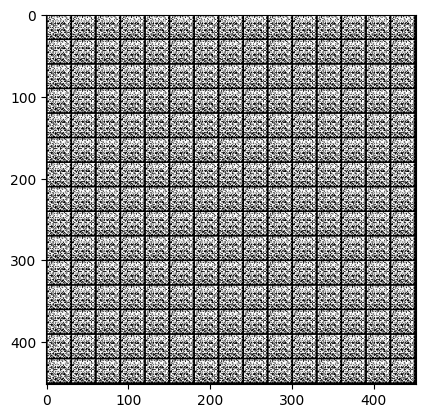

In [ ]:
steps = 0

for epoch in range(20): # for each epoch
    generator_losses = []
    discriminator_losses = []
    mean_real_dis_preds = []
    mean_fake_dis_preds = []

    for im, _ in tqdm(mnist_loader): # for each image in each epoch

        real_ims = im.float().to(device)
        batch_size = real_ims.shape[0]

        ''' ######################### First Optimizing the Discriminator ######################### '''

        optimizer_discriminator.zero_grad()

        fake_im_noise = torch.randn((batch_size, latent_dim), device=device) # creating a noisy data
        fake_ims = generator(fake_im_noise) # passing the noisy data through the generator to get fake image
        disc_real_pred = discriminator(real_ims) # passing real image to the discriminator
        disc_fake_pred = discriminator(fake_ims.detach()) # passing fake image to the discriminator but we are detaching it so that gradients are not computed for generator and generator is not trained while training the discriminator

        disc_loss = -torch.mean(torch.log(disc_real_pred.reshape(-1) + 0.0001) + torch.log(1. - disc_fake_pred.reshape(-1) + 0.0001) )

        disc_loss.backward()
        optimizer_discriminator.step()

        mean_real_dis_preds.append(torch.nn.Sigmoid()(disc_real_pred).mean().item())
        mean_fake_dis_preds.append(torch.nn.Sigmoid()(disc_fake_pred).mean().item())


        ''' ######################### Second Optimizing the Generator ######################### '''
        optimizer_generator.zero_grad()

        fake_im_noise = torch.randn((batch_size, latent_dim), device=device) # creating a noisy data
        fake_ims = generator(fake_im_noise) # passing through generator to create fake image
        disc_fake_pred = discriminator(fake_ims) # passing through discriminator to classify it as fake or real

        gen_fake_loss = -torch.mean(torch.log(disc_fake_pred.reshape(-1) + 0.0001))

        gen_fake_loss.backward()
        optimizer_generator.step()

        generator_losses.append(gen_fake_loss.item())
        discriminator_losses.append(disc_loss.item())

        ''' ######################### Seeing how the generator is improving with training ######################### '''
        if steps % 5 == 0:
            with torch.no_grad():
                generator.eval()

                NUM_SAMPLES = 225
                fake_im_noise = torch.randn((NUM_SAMPLES, latent_dim), device=device) # generating some noisy data
                fake_ims = generator(fake_im_noise) # generating image using generator
                ims = torch.clamp(fake_ims, -1., 1.).detach().cpu() # clamping the generated images
                ims = 0.5*ims + 0.5 #detransforming the images from [-1,1] to [0,1]
                grid = make_grid(ims, nrow=15)
                img = torchvision.transforms.ToPILImage()(grid)
                plt.imshow(img, cmap='gray') # now display the image here using matplot lib

                generator.train()
        steps += 1

    print(f'''Finished epoch:{epoch + 1} | Generator Loss : {np.mean(generator_losses)} | Discriminator Loss : {np.mean(discriminator_losses)} | Discriminator real pred : {np.mean(mean_real_dis_preds)} | Discriminator fake pred : {np.mean(mean_fake_dis_preds)}''')